<a href="https://colab.research.google.com/github/Renato-55/FakeNewsDetection/blob/main/FakeNewsDetectionProj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Load and store the dataset in the FakeNewsDetectionData 

In [ ]:
# Can be necessary to download the latest version of matplot in order to use comands
#such as ax.bar_label
!pip install seaborn --upgrade
!pip install matplotlib --upgrade

#bert import
#!pip install tensorflow_text
#!pip install tf-models-official
#!pip install pytorch-pretrained-bert pytorch-nlp

In [2]:
#API Token
!echo '{"username":"renatobarbosa0707","key":"688080334f032395f65abb05549c245c"}' > ~/.kaggle/kaggle.json
!touch ~/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
#download fake news dataset from kaggle
!kaggle competitions download fake-news

fake-news.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
#create new directory to store the dataset from kaggle
!mkdir FakeNewsDetectionData

mkdir: cannot create directory ‘FakeNewsDetectionData’: File exists


In [5]:
#unzip the data from source_path to target_path
!unzip "/content/fake-news.zip" -d "/content/FakeNewsDetectionData"

Archive:  /content/fake-news.zip
replace /content/FakeNewsDetectionData/submit.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/FakeNewsDetectionData/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/FakeNewsDetectionData/train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [6]:
#download emotions news dataset from kaggle
!kaggle competitions download -c tweet-sentiment-extraction

tweet-sentiment-extraction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
#create new directory to store the dataset from kaggle
!mkdir EmotionData

mkdir: cannot create directory ‘EmotionData’: File exists


In [8]:
#unzip the data from source_path to target_path
!unzip "/content/tweet-sentiment-extraction.zip" -d "/content/EmotionData"

Archive:  /content/tweet-sentiment-extraction.zip
replace /content/EmotionData/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/EmotionData/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/EmotionData/train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


# 2. Load data from the folder and make a simple analysis on the data

## Load and Data Prep (Data cleaning) on the fake news data set

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

#path to data
path_fakenews = "/content/FakeNewsDetectionData/"

#Load Data
train_data_fakenews = pd.read_csv(path_fakenews + "train.csv")
eval_data_x_fakenews = pd.read_csv(path_fakenews + "test.csv")
eval_data_y_fakenews = pd.read_csv(path_fakenews + "submit.csv")

In [ ]:
#data cleaning
null_val = train_data_fakenews.isnull().sum().sum()

if null_val == 0:
  print("No null values\n")
else:
  print(f"Null values: {null_val}\n")

features = []
null_values_table = []
for x in train_data_fakenews:
  features.append(x)
  null_values_table.append(train_data_fakenews[x].isnull().sum())
  print(f"The table {x} has {train_data_fakenews[x].isnull().sum()}")
 
sns.barplot(y=null_values_table,x=features)
plt.title("Null values in columns datasets")
plt.show()

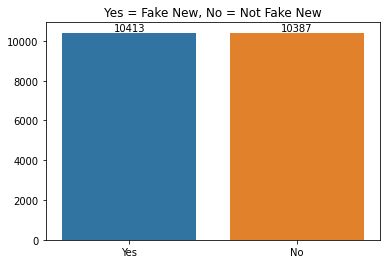

In [11]:
y = []
y.append(np.sum(train_data_fakenews['label'] == 1))
y.append(np.sum(train_data_fakenews['label'] == 0))

x = ['Yes','No']
ax = sns.barplot(x=x,y=y)
ax.bar_label(ax.containers[0])
plt.title("Yes = Fake New, No = Not Fake New")
plt.show()

## Load and Data Prep (Data cleaning) on the emotions data set

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

#path to data
path_emotions = "/content/EmotionData/"

#Load Data
train_data_emotions = pd.read_csv(path_emotions+ "train.csv")
test_data_emotions =  pd.read_csv(path_emotions+ "test.csv")
#eval_data_emotions =  pd.read_csv(path_emotions+ "val.txt", names=['Text', 'Emotion'], sep=';')

### Remove null val and data analysis on train_data

Null values: 2

The table textID has 0
The table text has 1
The table selected_text has 1
The table sentiment has 0


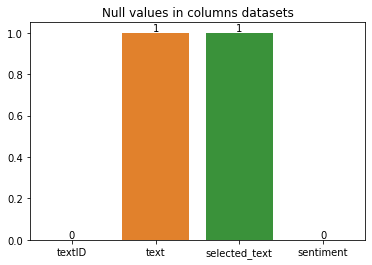

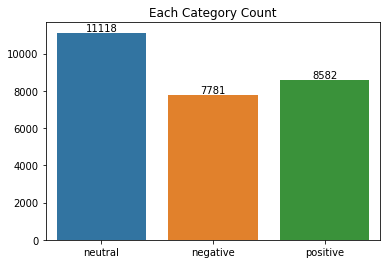

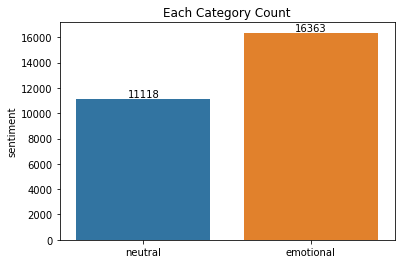

In [6]:
#data cleaning on train_data
null_val = train_data_emotions.isnull().sum().sum()

if null_val == 0:
  print("No null values\n")
else:
  print(f"Null values: {null_val}\n")

features = []
null_values_table = []
for x in train_data_emotions:
  features.append(x)
  null_values_table.append(train_data_emotions[x].isnull().sum())
  print(f"The table {x} has {train_data_emotions[x].isnull().sum()}")
 
ax = sns.barplot(y=null_values_table,x=features)
ax.bar_label(ax.containers[0])
plt.title("Null values in columns datasets")
plt.show()

#check how many times each emotion appers on the dataset
categorias_name = train_data_emotions.sentiment.unique()

categorias_count = []
for x in  categorias_name:
  counts = train_data_emotions.loc[train_data_emotions.sentiment == x]
  categorias_count.append(counts.shape[0])

ax = sns.barplot(x=categorias_name,y=categorias_count,data=train_data_emotions)
ax.bar_label(ax.containers[0])
plt.title("Each Category Count")
plt.show()

def swapLabelEmotion(str):
  return 0 if str == 'neutral' else 1

#Change the label to 0 and 1
train_data_emotions['sentiment'] = train_data_emotions['sentiment'].map(lambda x:swapLabelEmotion(x))

#check how many times each emotion appers on the dataset
categorias_count = train_data_emotions.groupby('sentiment').sentiment.count()
categorias_name = ['neutral','emotional']

ax = sns.barplot(x=categorias_name,y=categorias_count,data=train_data_emotions)
ax.bar_label(ax.containers[0])
plt.title("Each Category Count")
plt.show()

#i will drop the null value on the emotion dataset
train_data_emotions.dropna(inplace=True)

### Remove null val and data analysis on test_data

No null values

The table textID has 0
The table text has 0
The table sentiment has 0


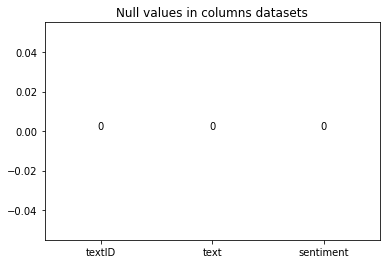

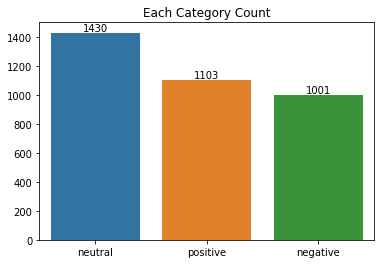

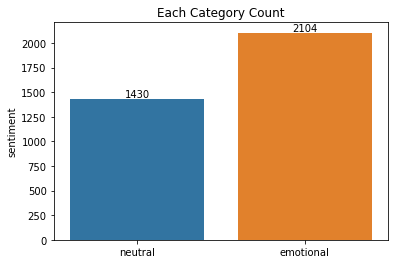

In [7]:
#data cleaning
null_val = test_data_emotions.isnull().sum().sum()

if null_val == 0:
  print("No null values\n")
else:
  print(f"Null values: {null_val}\n")

features = []
null_values_table = []
for x in test_data_emotions:
  features.append(x)
  null_values_table.append(test_data_emotions[x].isnull().sum())
  print(f"The table {x} has {test_data_emotions[x].isnull().sum()}")
 
ax = sns.barplot(y=null_values_table,x=features)
ax.bar_label(ax.containers[0])
plt.title("Null values in columns datasets")
plt.show()

#check how many times each emotion appers on the dataset
categorias_name = test_data_emotions.sentiment.unique()

categorias_count = []
for x in  categorias_name:
  counts = test_data_emotions.loc[test_data_emotions.sentiment == x]
  categorias_count.append(counts.shape[0])

ax = sns.barplot(x=categorias_name,y=categorias_count,data=test_data_emotions)
ax.bar_label(ax.containers[0])
plt.title("Each Category Count")
plt.show()

def swapLabelEmotion(str):
  return 0 if str == 'neutral' else 1

#Change the label to 0 and 1
test_data_emotions['sentiment'] = test_data_emotions['sentiment'].map(lambda x:swapLabelEmotion(x))

#check how many times each emotion appers on the dataset
categorias_count = test_data_emotions.groupby('sentiment').sentiment.count()
categorias_name = ['neutral','emotional']

ax = sns.barplot(x=categorias_name,y=categorias_count,data=test_data_emotions)
ax.bar_label(ax.containers[0])
plt.title("Each Category Count")
plt.show()

#i will drop the null value on the emotion dataset
test_data_emotions.dropna(inplace=True)

# 3. Train the model whit the data provided

##   Bert Model to classify emotions - Data prep






In [8]:
import string
#I need to clean out the data from text
def removePunc(s):
  return s.translate(str.maketrans('', '', string.punctuation))

def removeWordsLessThan(sentence):
  spilted_sentence = sentence.split()
  new_str = []
  for s in spilted_sentence:
    if len(s) > 3:
      new_str.append(s)

  return " ".join(new_str)

train_data_emotions['text'] = train_data_emotions['text'].map(lambda x:removeWordsLessThan(x))
train_data_emotions['text'] = train_data_emotions['text'].map(lambda x:removePunc(x))

test_data_emotions['text'] = test_data_emotions['text'].map(lambda x:removeWordsLessThan(x))
test_data_emotions['text'] = test_data_emotions['text'].map(lambda x:removePunc(x))

In [9]:
# BERT imports
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from pytorch_pretrained_bert import BertTokenizer, BertConfig
from pytorch_pretrained_bert import BertAdam, BertForSequenceClassification
from tqdm import tqdm, trange
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

# specify GPU device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()
#torch.cuda.get_device_name(0)

### Tokenizing the train_data_emotion.text

In [10]:
# add special tokens for BERT to work properly
sentences = ["[CLS] " + query + " [SEP]" for query in train_data_emotions.text]
print(sentences[0])

# Tokenize with BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]
print ("Tokenize the first sentence:")
print (tokenized_texts[0])

[CLS] have responded were going [SEP]
Tokenize the first sentence:
['[CLS]', 'have', 'responded', 'were', 'going', '[SEP]']


In [11]:
# Set the maximum sequence length. 
MAX_LEN = 128
# Pad our input tokens
input_ids = pad_sequences([tokenizer.convert_tokens_to_ids(txt) for txt in tokenized_texts],
                          maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

# Use the BERT tokenizer to convert the tokens to their index numbers in the BERT vocabulary
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]

input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

### Tokenizing the test_data_emotion.text

In [12]:
# add special tokens for BERT to work properly
sentences_ = ["[CLS] " + query + " [SEP]" for query in test_data_emotions.text]
print(sentences_[0])

# Tokenize with BERT tokenizer
tokenizer_ = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
tokenized_texts_ = [tokenizer_.tokenize(sent) for sent in sentences_]
print ("Tokenize the first sentence:")
print (tokenized_texts_[0])

[CLS] Last session httptwitpiccom67ezh [SEP]
Tokenize the first sentence:
['[CLS]', 'last', 'session', 'http', '##t', '##wi', '##tp', '##ic', '##com', '##6', '##7', '##ez', '##h', '[SEP]']


In [13]:
# Set the maximum sequence length. 
MAX_LEN = 128
# Pad our input tokens
input_ids_ = pad_sequences([tokenizer_.convert_tokens_to_ids(txt) for txt in tokenized_texts_],
                          maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

# Use the BERT tokenizer to convert the tokens to their index numbers in the BERT vocabulary
input_ids_ = [tokenizer_.convert_tokens_to_ids(x) for x in tokenized_texts_]

input_ids_ = pad_sequences(input_ids_, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

##   Bert Model to classify emotions - Keras






In [14]:
import os
import shutil

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

AUTOTUNE = tf.data.AUTOTUNE
batch_size = 32
seed = 42

class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.attention = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim)
        self.dense_proj = keras.Sequential(
            [layers.Dense(dense_dim, activation="relu"),
             layers.Dense(embed_dim),]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()

    def call(self, inputs, mask=None):
        if mask is not None:
            mask = mask[:, tf.newaxis, :]
        attention_output = self.attention(
            inputs, inputs, attention_mask=mask)
        proj_input = self.layernorm_1(inputs + attention_output)
        proj_output = self.dense_proj(proj_input)
        return self.layernorm_2(proj_input + proj_output)

    def get_config(self):
        config = super().get_config()
        config.update({
            "embed_dim": self.embed_dim,
            "num_heads": self.num_heads,
            "dense_dim": self.dense_dim,
        })
        return config

In [ ]:
vocab_size = 30000
embed_dim = 256
num_heads = 2
dense_dim = 32

inputs = keras.Input(shape=(None,), dtype="int64")
x = layers.Embedding(vocab_size, embed_dim)(inputs)
x = TransformerEncoder(embed_dim, dense_dim, num_heads)(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop",
              #loss="categorical_crossentropy",
              loss="mean_squared_error",
              metrics=["accuracy"])
model.summary()

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint( filepath="/content/transformer_encoder.keras",
                                    save_best_only=True)
]

y =  train_data_emotions['sentiment']
y2 =  test_data_emotions['sentiment']

history = model.fit(input_ids,y, epochs=40, callbacks=callbacks, validation_data=(input_ids_, y2))

model = keras.models.load_model(
    filepath="/content/transformer_encoder.keras",
    custom_objects={"TransformerEncoder": TransformerEncoder})

